In [1]:
import os
import requests
from dotenv import load_dotenv
import zipfile
import io

# Load environment variables
load_dotenv()

KAGGLE_USERNAME = os.getenv("KAGGLE_USERNAME")
KAGGLE_KEY = os.getenv("KAGGLE_KEY")

# Kaggle API endpoint (datasets download)
url = "https://www.kaggle.com/api/v1/datasets/download/nisargpatel344/student-course-completion-prediction-dataset"

# Where to save the extracted files
output_folder = os.getcwd()  # your current project folder
print("Saving files to:", output_folder)

# Perform authenticated request
response = requests.get(
    url,
    auth=(KAGGLE_USERNAME, KAGGLE_KEY),
    stream=True
)

if response.status_code != 200:
    print("Download failed:", response.text)
else:
    print("Download successful! Extracting...")

    # Unzip in memory and extract directly to project folder
    z = zipfile.ZipFile(io.BytesIO(response.content))
    z.extractall(output_folder)

    print("Files extracted:")
    for name in z.namelist():
        print(" -", name)


Saving files to: c:\Users\alimm\OneDrive\Desktop\Projects\Student Course Completion
Download successful! Extracting...
Files extracted:
 - Course_Completion_Prediction.csv


In [2]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("Course_Completion_Prediction.csv")

X = dataset["Age"]
np.percentile(X, 60, method="linear")
dataset.describe()


,Age,Course_Duration_Days,Instructor_Rating,Login_Frequency,Average_Session_Duration_Min,Video_Completion_Rate,Discussion_Participation,Time_Spent_Hours,Days_Since_Last_Login,Notifications_Checked,...,Quiz_Attempts,Quiz_Score_Avg,Project_Grade,Progress_Percentage,Rewatch_Count,Payment_Amount,App_Usage_Percentage,Reminder_Emails_Clicked,Support_Tickets_Raised,Satisfaction_Rating
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,25.709590,51.817300,4.444478,4.785380,33.878180,62.174580,2.329290,3.873632,6.188860,5.232110,...,3.772330,73.276201,68.189534,53.823104,2.323930,3253.427120,67.859510,2.332650,0.870980,4.132128
std,5.615292,20.324801,0.202631,1.848289,10.341964,19.558126,1.591365,3.781185,6.982047,2.401486,...,2.021276,12.552344,15.312036,12.495622,1.580735,2084.391775,19.138354,1.584626,0.951569,0.700895
min,17.000000,25.000000,4.100000,0.000000,5.000000,5.000000,0.000000,0.500000,0.000000,0.000000,...,0.000000,19.600000,0.000000,7.600000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,21.000000,30.000000,4.300000,3.000000,27.000000,48.500000,1.000000,0.500000,1.000000,4.000000,...,2.000000,64.700000,57.700000,45.400000,1.000000,1242.000000,55.000000,1.000000,0.000000,3.700000
50%,25.000000,45.000000,4.500000,5.000000,34.000000,64.000000,2.000000,2.700000,4.000000,5.000000,...,4.000000,73.300000,68.300000,53.900000,2.000000,3715.000000,68.000000,2.000000,1.000000,4.200000
75%,30.000000,60.000000,4.600000,6.000000,41.000000,77.500000,3.000000,6.200000,9.000000,7.000000,...,5.000000,82.000000,78.800000,62.400000,3.000000,4685.000000,82.000000,3.000000,1.000000,4.700000
max,52.000000,90.000000,4.700000,15.000000,81.000000,99.900000,12.000000,25.600000,99.000000,18.000000,...,16.000000,100.000000,100.000000,98.600000,15.000000,7149.000000,100.000000,13.000000,8.000000,5.000000


array([[<Axes: title={'center': 'Instructor_Rating'}>]], dtype=object)

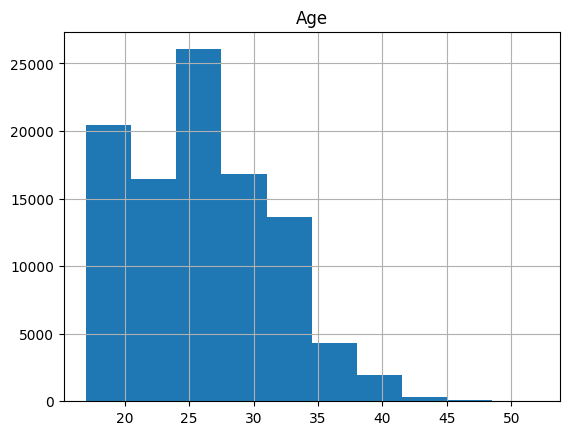

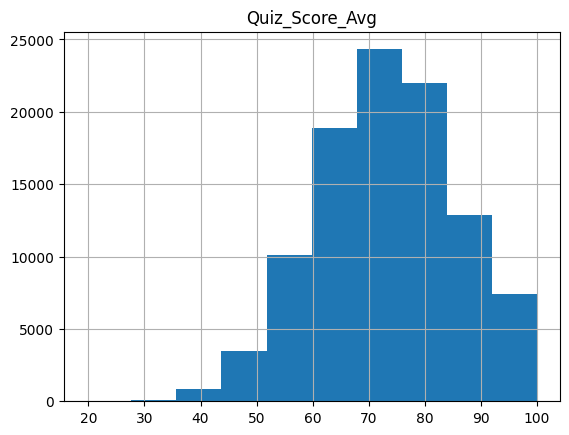

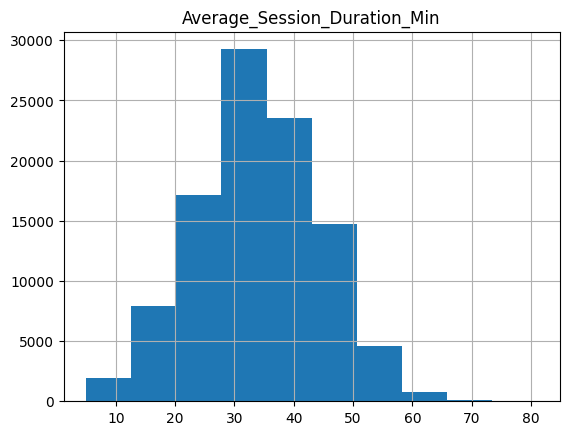

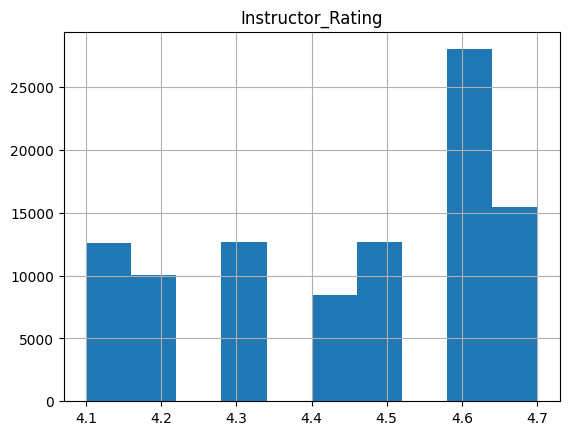

In [3]:
dataset.hist(column="Age", bins=10)
dataset.hist(column="Quiz_Score_Avg", bins=10)
dataset.hist(column="Average_Session_Duration_Min", bins=10)
dataset.hist(column="Instructor_Rating", bins=10)

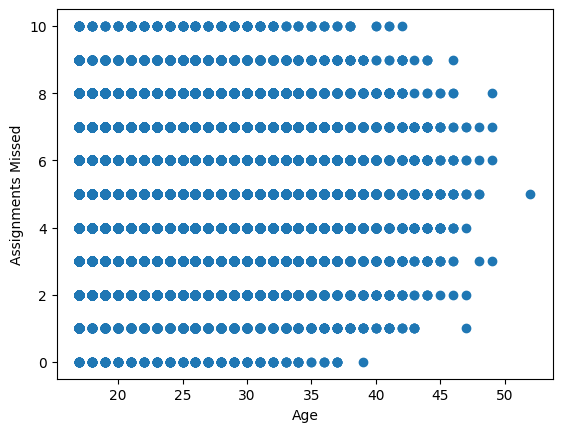

In [4]:
import matplotlib.pyplot as plt

plt.scatter(dataset['Age'], dataset['Assignments_Missed'])
plt.ylabel('Assignments Missed')
plt.xlabel('Age')
plt.show()



In [8]:
dataset['Device_Type'].value_counts()

Device_Type
Mobile    60021
Laptop    35018
Tablet     4961
Name: count, dtype: int64